In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

In [6]:
df = pd.read_csv('conhecimento.csv')
df['dia'] = df.id_cena.str[-3:].astype(int)

id_cenas = [
    'LS82260702016078', 'LS82260702017256', # 226_070
    'LS82210702016059', 'LS82210702017269', # 221_070
    'LS52210672002068', 'LS82210672017285', # 221_067
    'LS82210742016059', 'LS82210742018128', # 221_074
]


In [18]:
def gera_teste_modelo_caso1(id_cena):
    print(id_cena)

    teste_original = df[df.id_cena== id_cena].copy().reset_index(drop=True)
    teste = teste_original.copy()
    teste['verifica'] = 0
    print(len(teste_original))

    # Modelo
    modelo = df[~(df.id_cena==id_cena)].copy()

    print(len(modelo))
    print(modelo.verifica.value_counts())
    return teste, teste_original, modelo

(388551, 15) 256 LS82260702017256
961
387590
3    275211
1    112379
Name: verifica, dtype: int64
Criando classificador RF
RF - Classifica dado usando as colunas ['nbrl', 'medianb5']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais
Confusion matrix, without normalization
[[745  60]
 [  1 155]]
Normalized confusion matrix
[[0.92546584 0.07453416]
 [0.00641026 0.99358974]]


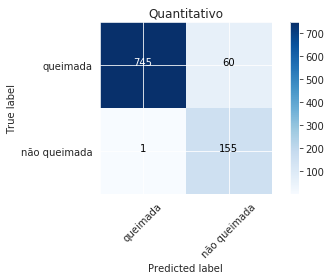

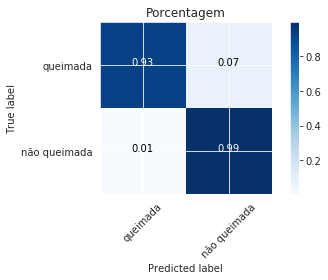

Acertos: 900/961 (93%)
LS82260702017256


In [23]:
for id_cena in id_cenas:
    id_cena = 'LS82260702017256'
    teste, teste_original, modelo = gera_teste_modelo(id_cena)
    
    y_pred = classificacao.classifica(modelo, teste)
    y_true = teste_original.sort_values('id').reset_index(drop=True)
    
    classificacao.mostra_resultado(y_pred, y_true)
    print(id_cena)
    break

In [12]:
df[df.id_cena==id_cena].verifica.value_counts()

3    1893
1       1
Name: verifica, dtype: int64

In [20]:
def get_id_cenas(df, orb_pto):
    return sorted(list(df[df.orb_pto==orb_pto].id_cena.unique()))

In [22]:
get_id_cenas(df, '226_070')

['LS82260702016078',
 'LS82260702016094',
 'LS82260702016110',
 'LS82260702016158',
 'LS82260702016190',
 'LS82260702016206',
 'LS82260702016222',
 'LS82260702016238',
 'LS82260702016254',
 'LS82260702016270',
 'LS82260702016302',
 'LS82260702016334',
 'LS82260702017096',
 'LS82260702017112',
 'LS82260702017128',
 'LS82260702017144',
 'LS82260702017160',
 'LS82260702017176',
 'LS82260702017192',
 'LS82260702017208',
 'LS82260702017224',
 'LS82260702017240',
 'LS82260702017256']

In [27]:
# [[745  60]
#  [  1 155]]

In [39]:
def resultado(teste, teste_original):
    r = pd.merge(teste[['id', 'classificacao']], teste_original[['id', 'verifica']], on='id')
    r['v'] = r.classificacao.astype(str) + r.verifica.astype(str)
    
    x = len(r[(r.verifica==1) & (r.classificacao == 1)])
    v = len(r[r.verifica==1])
    p = int((x*100)/v)
    
    return x, v, p

In [40]:
resultado(teste, teste_original)

(745, 805, 92)